In [8]:
import karman
batch_size = 512
num_workers = 30
data_directory = '/home/jupyter/karman-project/data_directory'
cyclical_features=True
fism2_daily_stan_bands_resolution=1440
fism2_flare_stan_bands_resolution=30
omni_resolution=30
lag_fism2_minutes_daily_stan_bands=1440
lag_fism2_minutes_flare_stan_bands=1440
lag_minutes_omni=6*60
features_to_exclude_thermo='all__dates_datetime__,tudelft_thermo__satellite__,tudelft_thermo__ground_truth_thermospheric_density__[kg/m**3],NRLMSISE00__thermospheric_density__[kg/m**3],JB08__thermospheric_density__[kg/m**3]'
features_to_exclude_omni='all__dates_datetime__,omniweb__id_for_imf_spacecraft__,omniweb__id_for_sw_plasma_spacecraft__,omniweb__#_of_points_in_imf_averages__,omniweb__#_of_points_in_plasma_averages__,omniweb__percent_of_interpolation__,omniweb__timeshift__[s],omniweb__rms_timeshift__[s],omniweb__rms_min_variance__[s**2],omniweb__time_btwn_observations__[s],omniweb__rms_sd_b_scalar__[nT],omniweb__rms_sd_b_field_vector__[nT],omniweb__flow_pressure__[nPa],omniweb__electric_field__[mV/m],omniweb__plasma_beta__,omniweb__alfven_mach_number__,omniweb__magnetosonic_mach_number__,omniweb__s/cx_gse__[Re],omniweb__s/cy_gse__[Re],omniweb__s/cz_gse__[Re]'
features_to_exclude_fism2_flare_stan_bands='all__dates_datetime__'
features_to_exclude_fism2_daily_stan_bands='all__dates_datetime__'

In [12]:
dataset=karman.ThermosphericDensityDataset(
    directory=data_directory,
    lag_minutes_omni=lag_minutes_omni,
    lag_minutes_fism2_flare_stan_bands=lag_fism2_minutes_flare_stan_bands,
    lag_minutes_fism2_daily_stan_bands=lag_fism2_minutes_daily_stan_bands,
    omni_resolution=omni_resolution,
    fism2_flare_stan_bands_resolution=fism2_flare_stan_bands_resolution,
    fism2_daily_stan_bands_resolution=fism2_daily_stan_bands_resolution,
    features_to_exclude_thermo=features_to_exclude_thermo.split(','),
    features_to_exclude_omni=features_to_exclude_omni.split(','),
    features_to_exclude_fism2_flare_stan_bands=features_to_exclude_fism2_flare_stan_bands.split(','),
    features_to_exclude_fism2_daily_stan_bands=features_to_exclude_fism2_daily_stan_bands.split(','),
    create_cyclical_features=cyclical_features,
    max_altitude=600000.
)

Loading Omni.
Loading FISM2 Flare Stan bands.
Loading FISM2 Daily Stan bands.
Creating thermospheric density dataset
Creating cyclical features

Finished Creating dataset.


In [15]:
dataset.data_thermo['data_matrix'].shape

torch.Size([33306806, 41])

In [18]:
import random
idxs=random.sample(range(33306806),1000000)

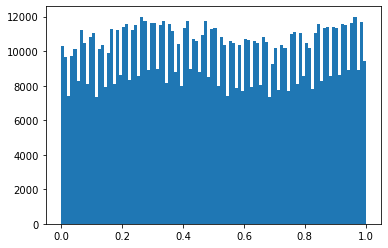

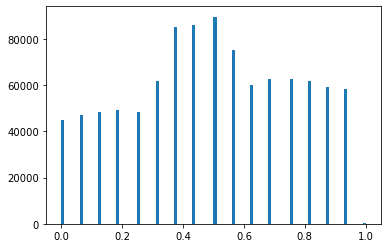

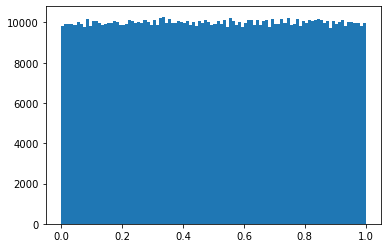

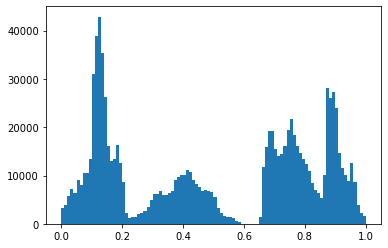

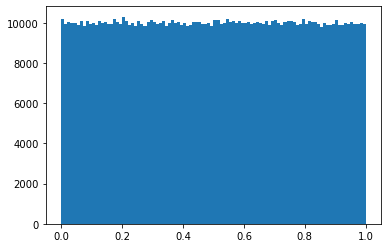

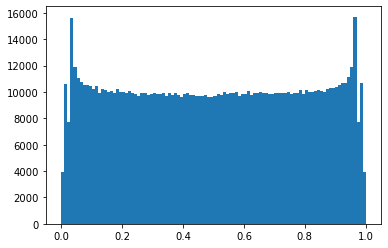

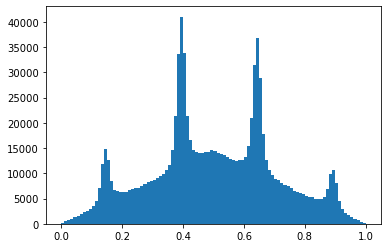

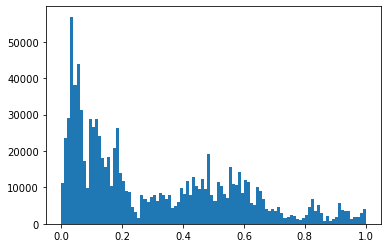

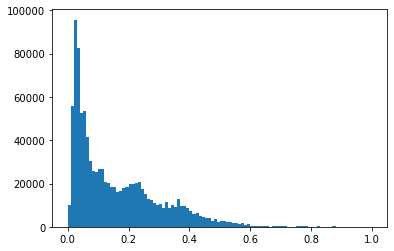

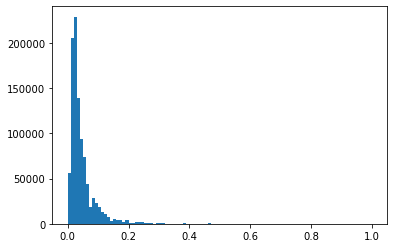

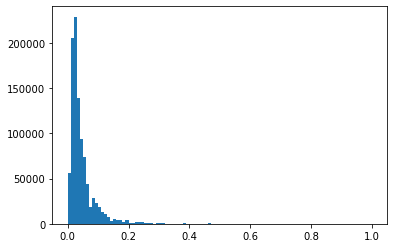

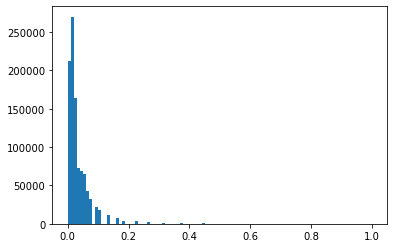

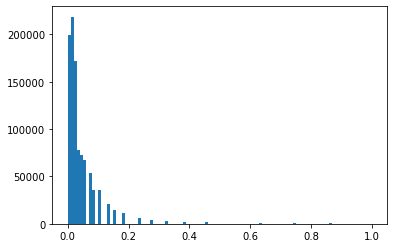

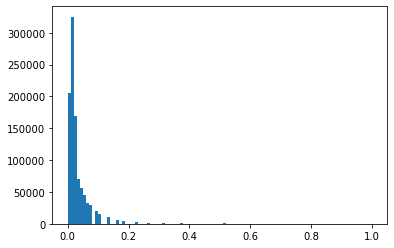

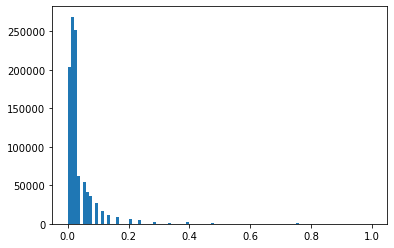

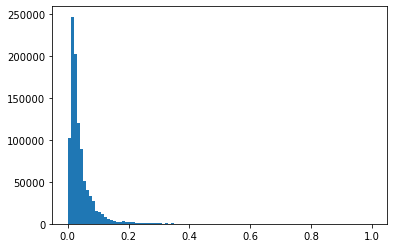

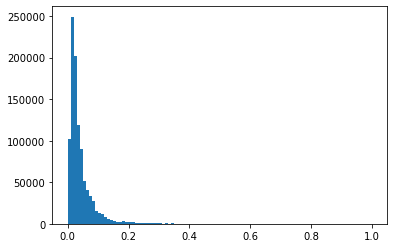

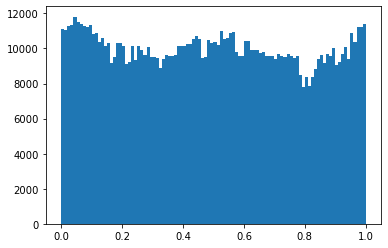

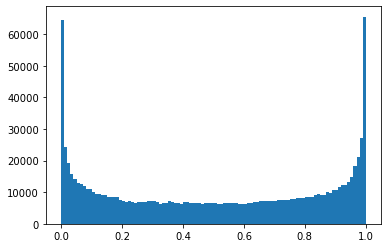

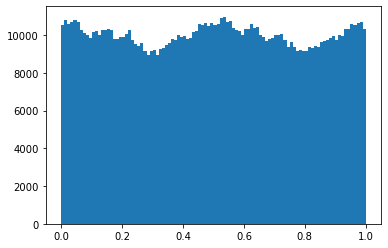

In [29]:
import matplotlib.pyplot as plt
for i in range(20):
    plt.hist(dataset.data_thermo['data_matrix'][idxs,i],bins=100)
    plt.show()

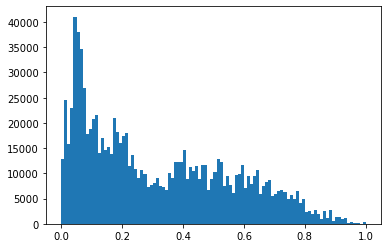

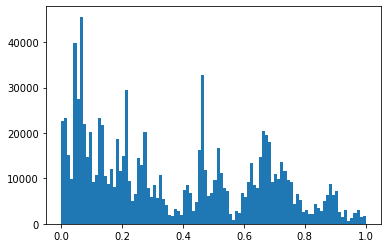

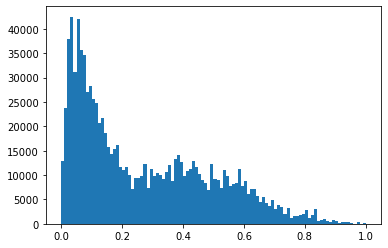

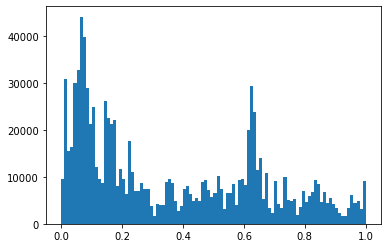

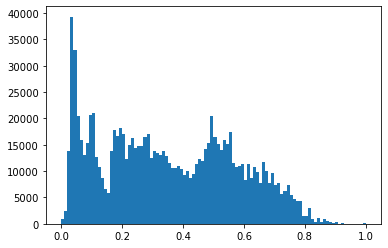

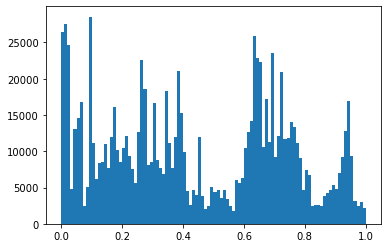

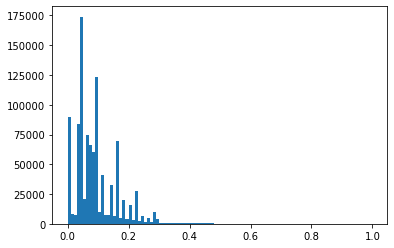

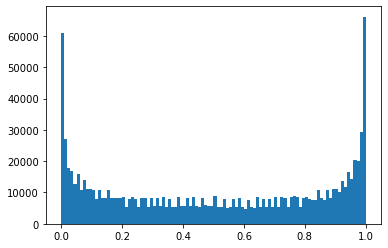

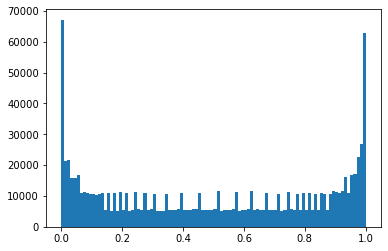

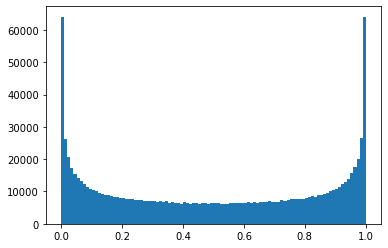

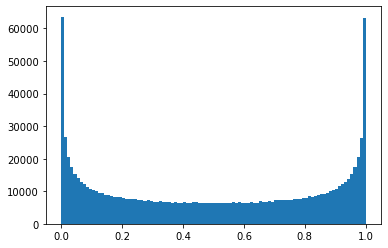

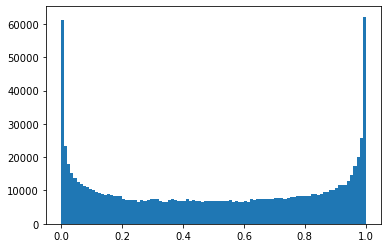

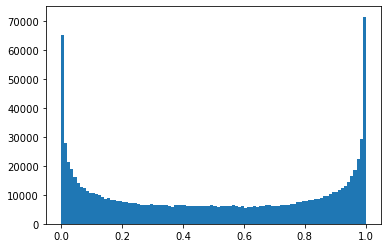

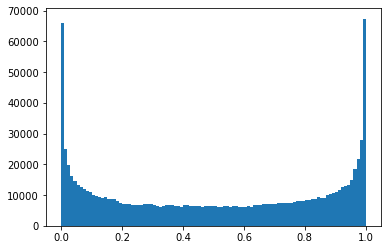

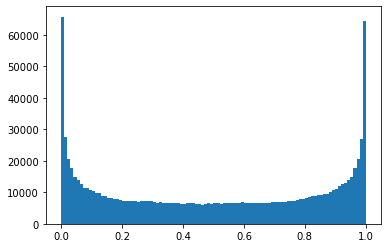

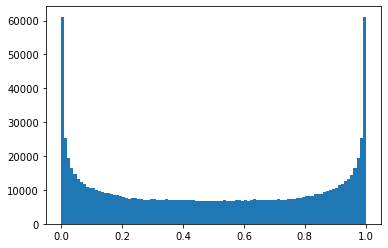

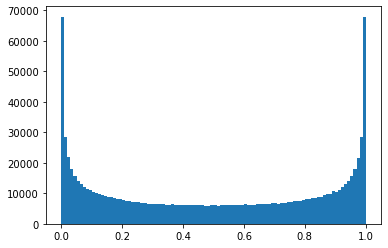

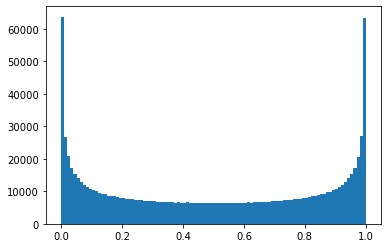

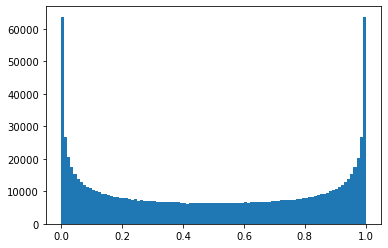

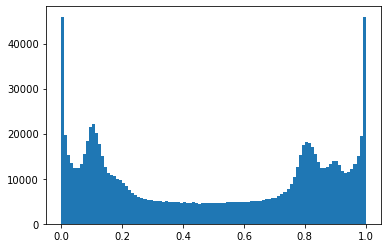

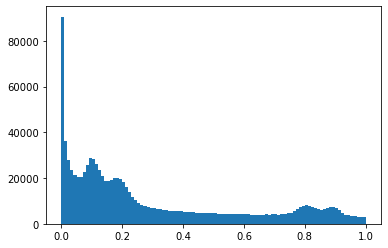

In [31]:
for i in range(20,41):
    plt.hist(dataset.data_thermo['data_matrix'][idxs,i],bins=100)
    plt.show()

In [30]:
dataset.time_series_data.keys()

dict_keys(['omni', 'fism2_flare_stan_bands', 'fism2_daily_stan_bands'])

In [37]:
dataset.time_series_data['omni']['data_matrix'].shape

torch.Size([372528, 23])

In [33]:
dataset.time_series_data['fism2_daily_stan_bands']['data_matrix'].shape

torch.Size([27565, 23])

In [34]:
dataset.time_series_data['fism2_flare_stan_bands']['data_matrix'].shape

torch.Size([325201, 23])

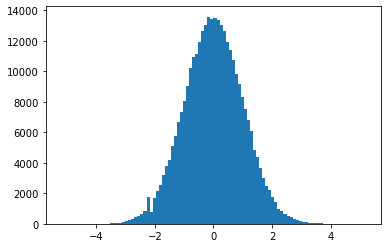

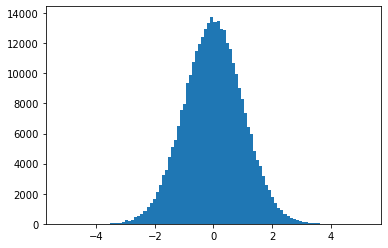

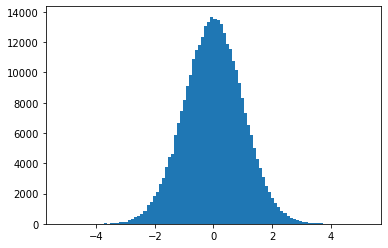

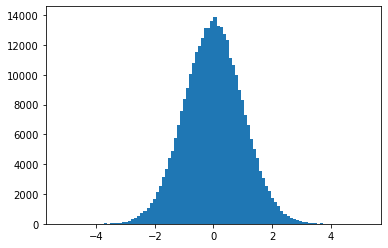

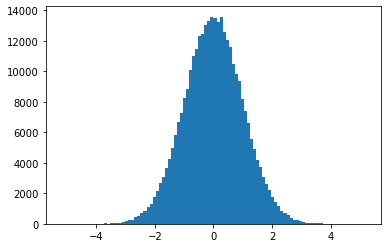

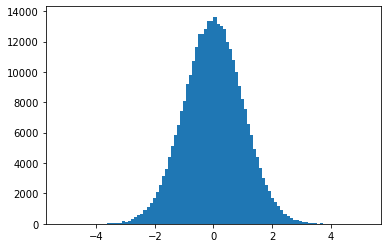

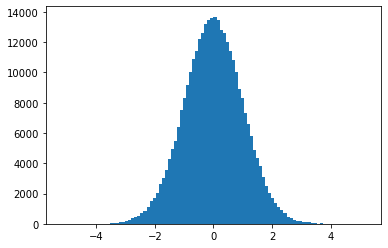

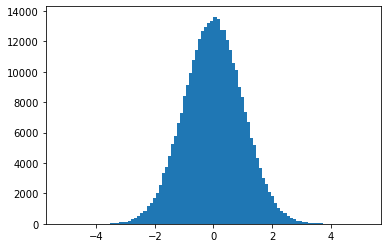

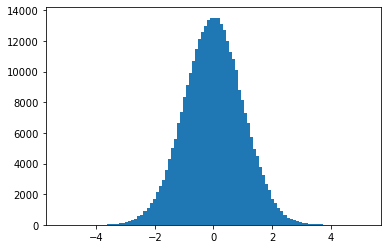

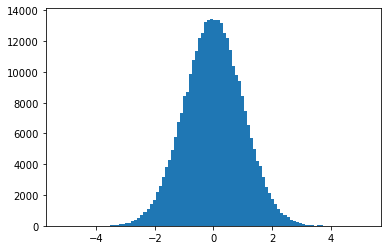

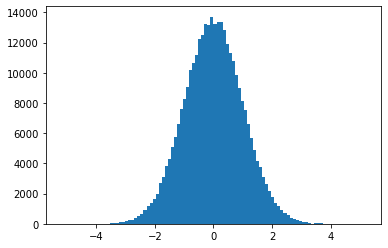

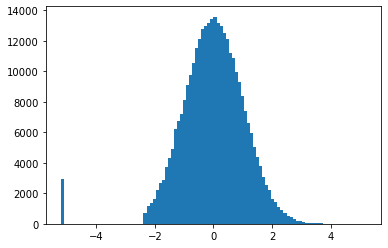

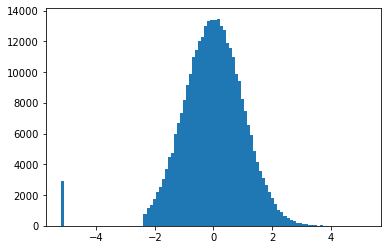

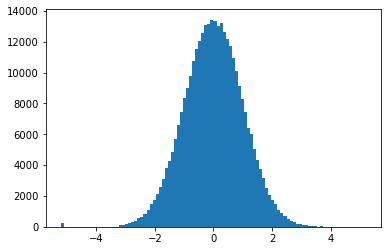

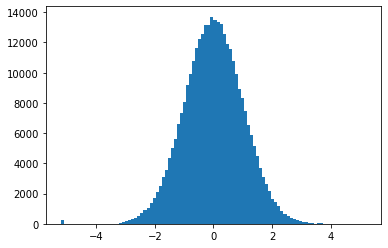

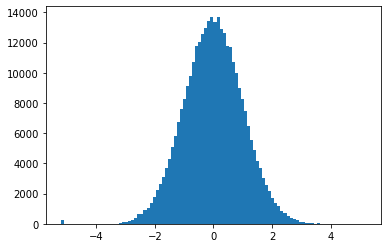

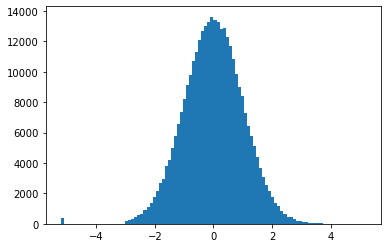

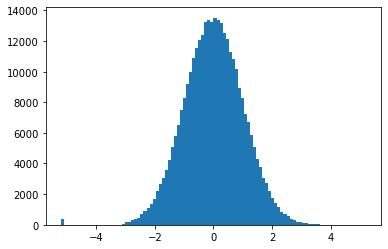

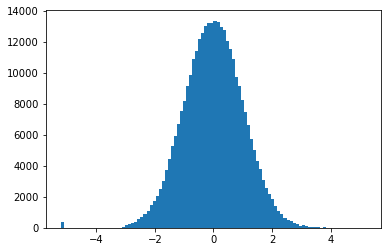

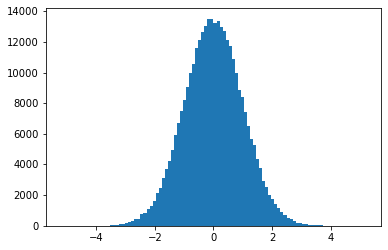

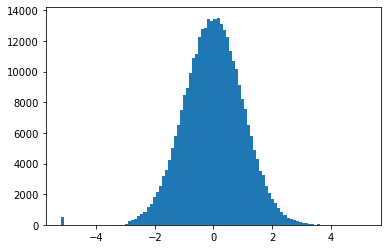

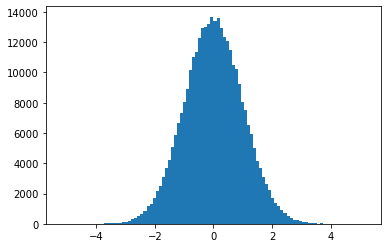

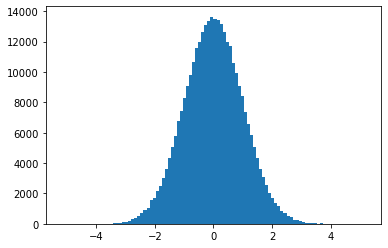

In [38]:
for i in range(23):
    plt.hist(dataset.time_series_data['fism2_flare_stan_bands']['data_matrix'][:,i],bins=100)
    plt.show()

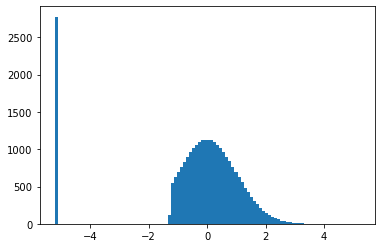

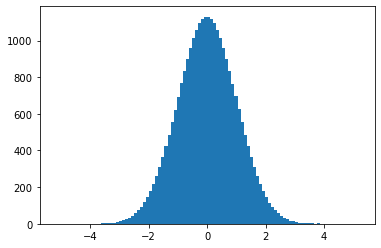

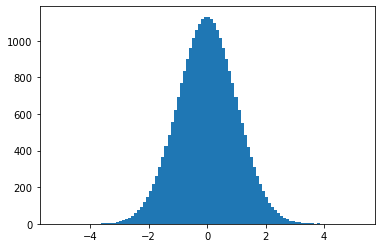

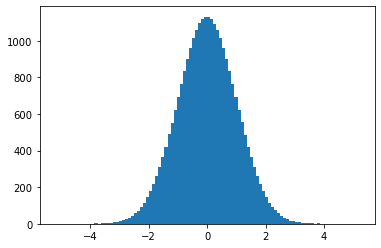

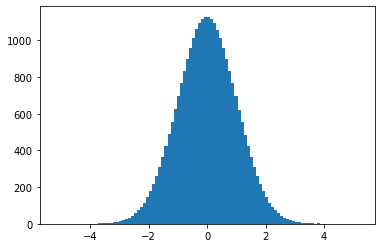

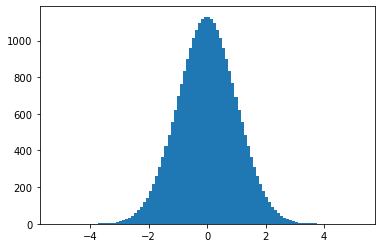

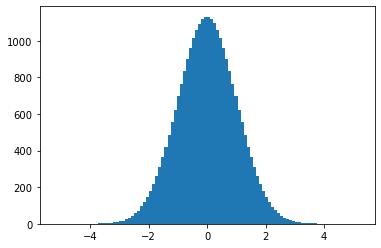

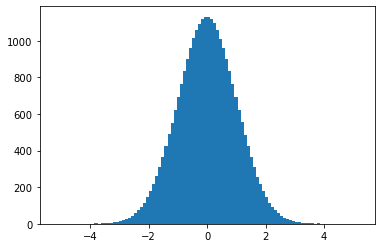

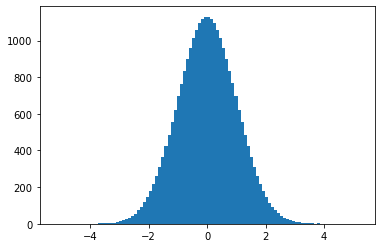

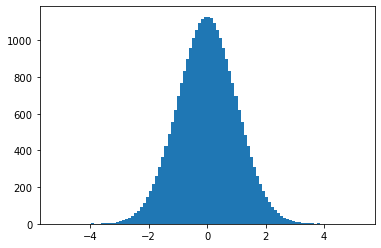

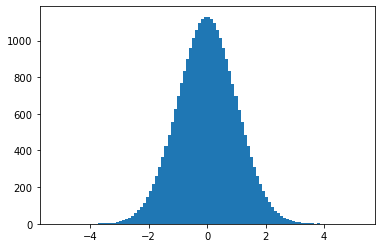

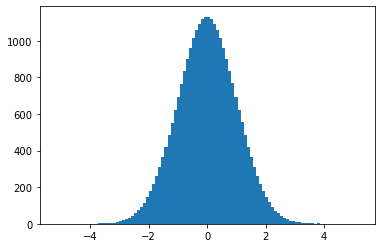

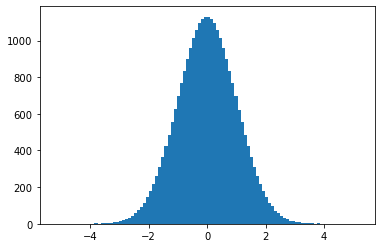

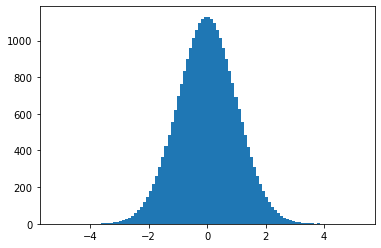

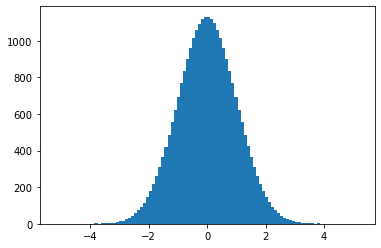

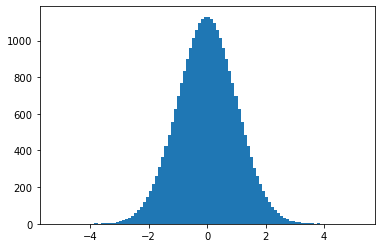

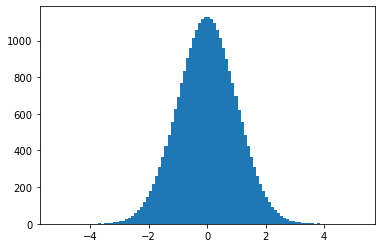

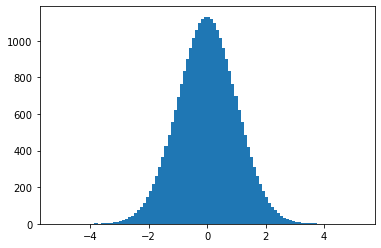

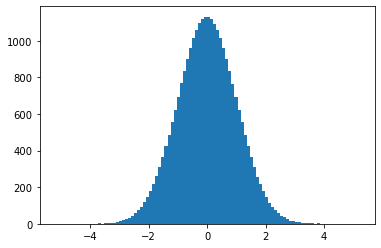

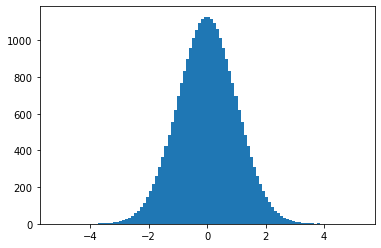

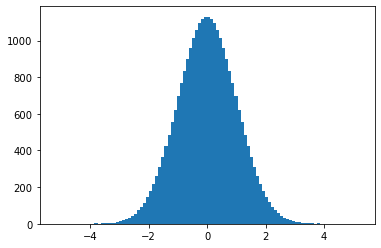

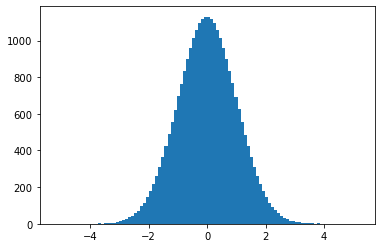

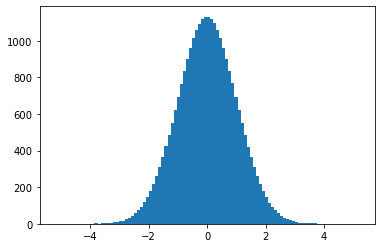

In [39]:
for i in range(23):
    plt.hist(dataset.time_series_data['fism2_daily_stan_bands']['data_matrix'][:,i],bins=100)
    plt.show()

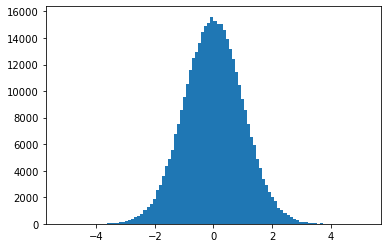

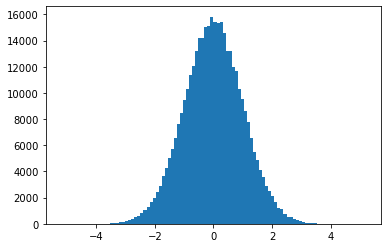

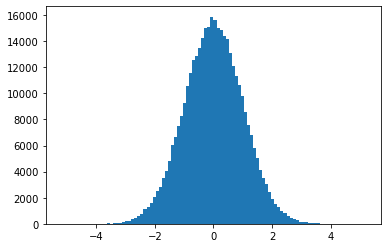

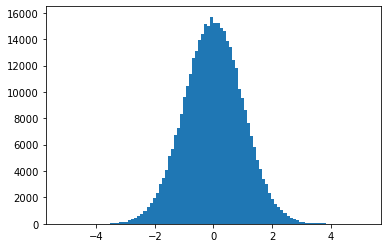

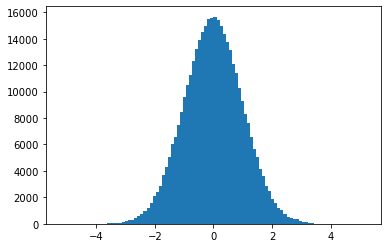

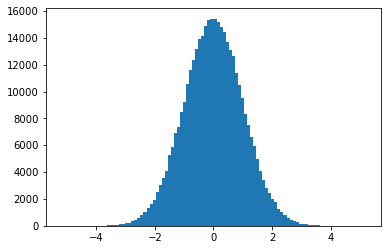

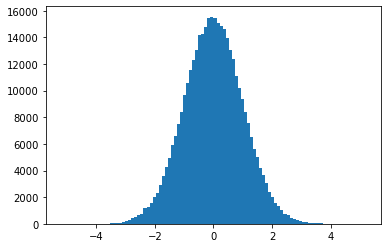

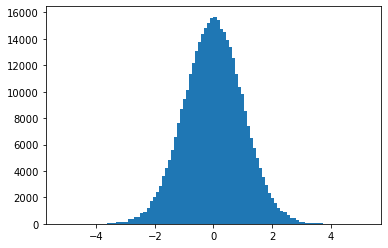

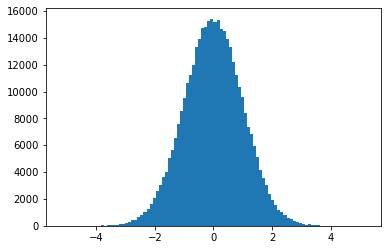

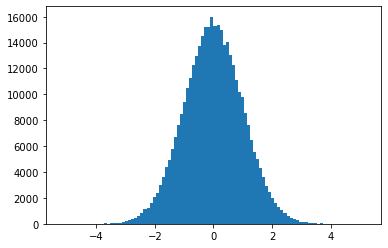

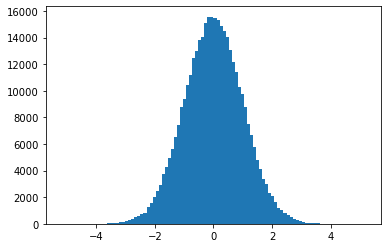

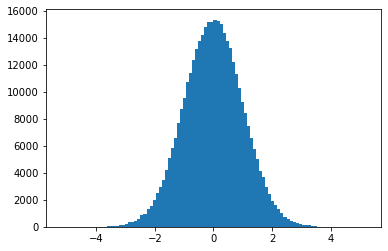

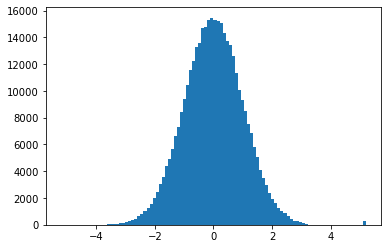

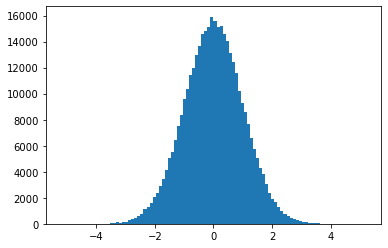

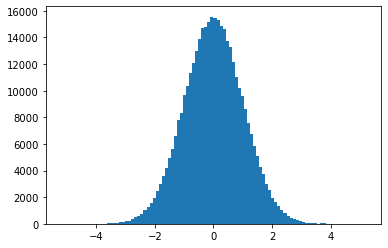

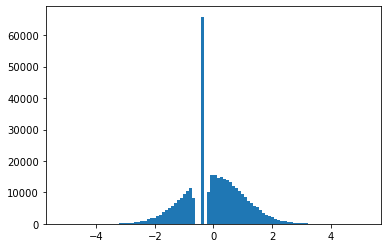

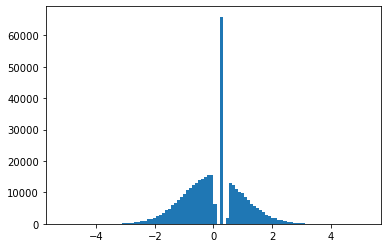

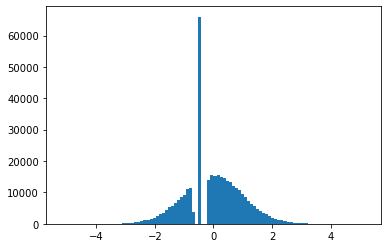

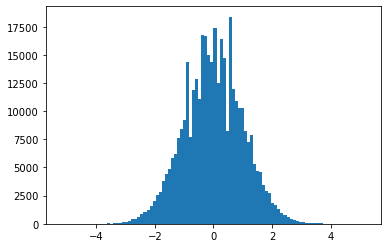

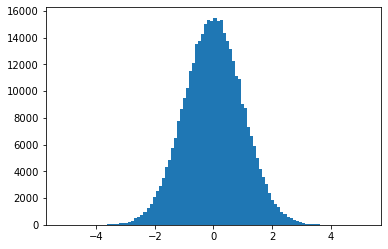

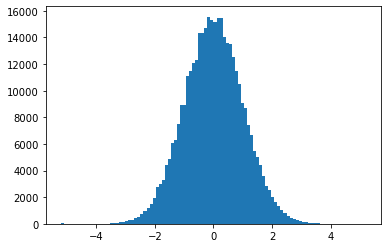

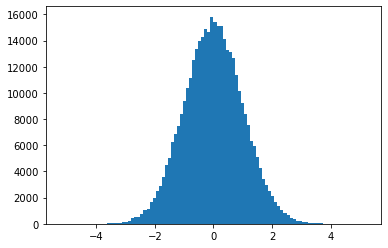

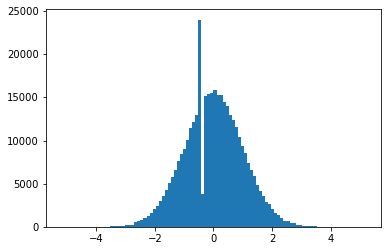

In [40]:
for i in range(23):
    plt.hist(dataset.time_series_data['omni']['data_matrix'][:,i],bins=100)
    plt.show()

In [45]:
import pandas as pd
import os
data_fism2_stan_bands_daily=pd.read_hdf(os.path.join(dataset._directory, 'fism2_daily_stan_bands.h5'))

array([[<AxesSubplot:title={'center':'fism2_daily_stan_bands__E0_05_0_4__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_daily_stan_bands__E0_4_0_8__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_daily_stan_bands__E0_8_1_8__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_daily_stan_bands__E1_8_3_2__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_daily_stan_bands__E3_2_7_0__[photons/cm**2/s]'}>],
       [<AxesSubplot:title={'center':'fism2_daily_stan_bands__E7_0_15_5__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_daily_stan_bands__E15_5_22_4__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_daily_stan_bands__E22_4_29_0__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_daily_stan_bands__E29_0_32_0__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_daily_stan_bands__E32_0_54_0__[photons/cm**2/s]'}>],
       [<AxesSubplot:title={'center':'fism2_dail

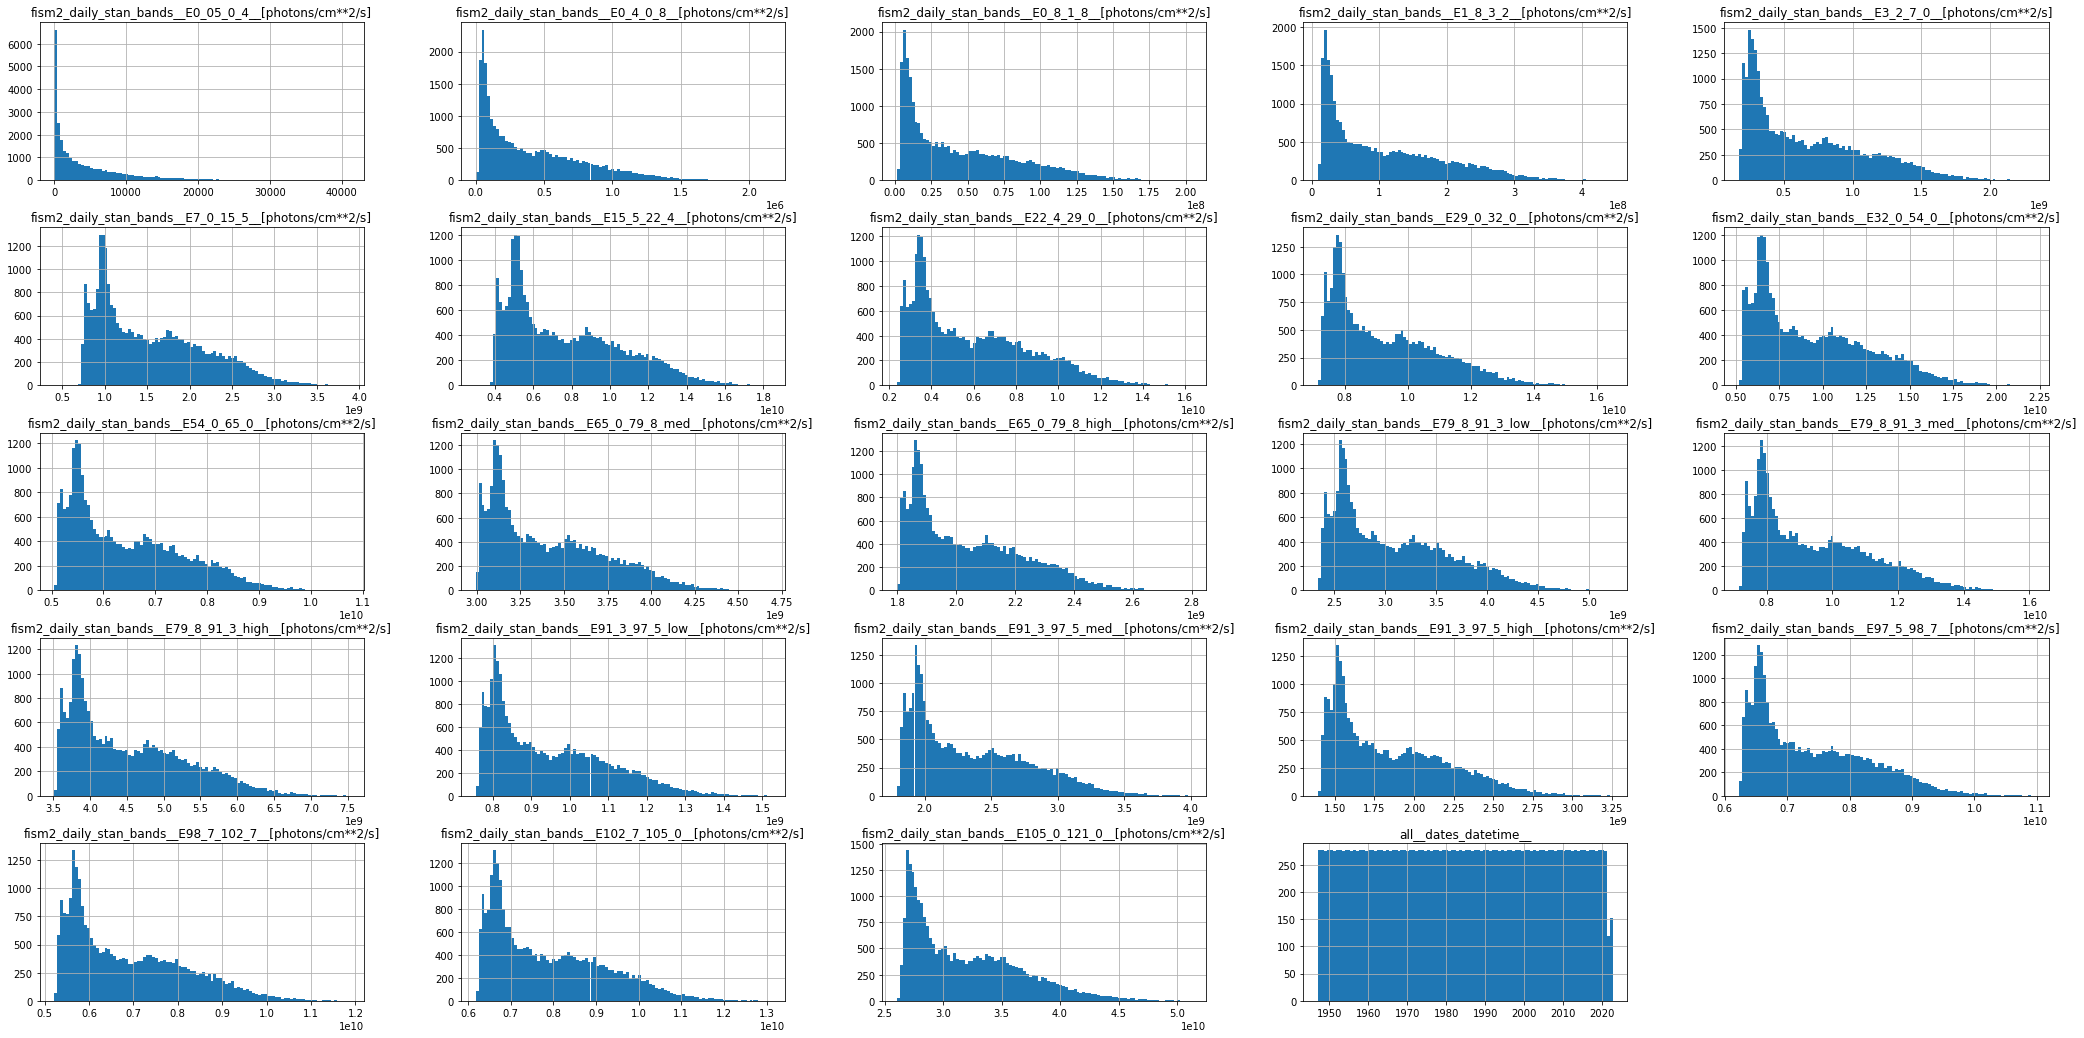

In [66]:
data_fism2_stan_bands_daily.hist(bins=100,figsize=(36,18))

In [56]:
data_fism2_stan_bands_flare=pd.read_hdf(os.path.join(dataset._directory, 'fism2_flare_stan_bands.h5'))
data_omni=pd.read_hdf(os.path.join(dataset._directory, 'data_omniweb_v1/omniweb_1min_data_2001_2022.h5'))

array([[<AxesSubplot:title={'center':'fism2_flare_stan_bands__E0_05_0_4__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_flare_stan_bands__E0_4_0_8__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_flare_stan_bands__E0_8_1_8__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_flare_stan_bands__E1_8_3_2__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_flare_stan_bands__E3_2_7_0__[photons/cm**2/s]'}>],
       [<AxesSubplot:title={'center':'fism2_flare_stan_bands__E7_0_15_5__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_flare_stan_bands__E15_5_22_4__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_flare_stan_bands__E22_4_29_0__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_flare_stan_bands__E29_0_32_0__[photons/cm**2/s]'}>,
        <AxesSubplot:title={'center':'fism2_flare_stan_bands__E32_0_54_0__[photons/cm**2/s]'}>],
       [<AxesSubplot:title={'center':'fism2_flar

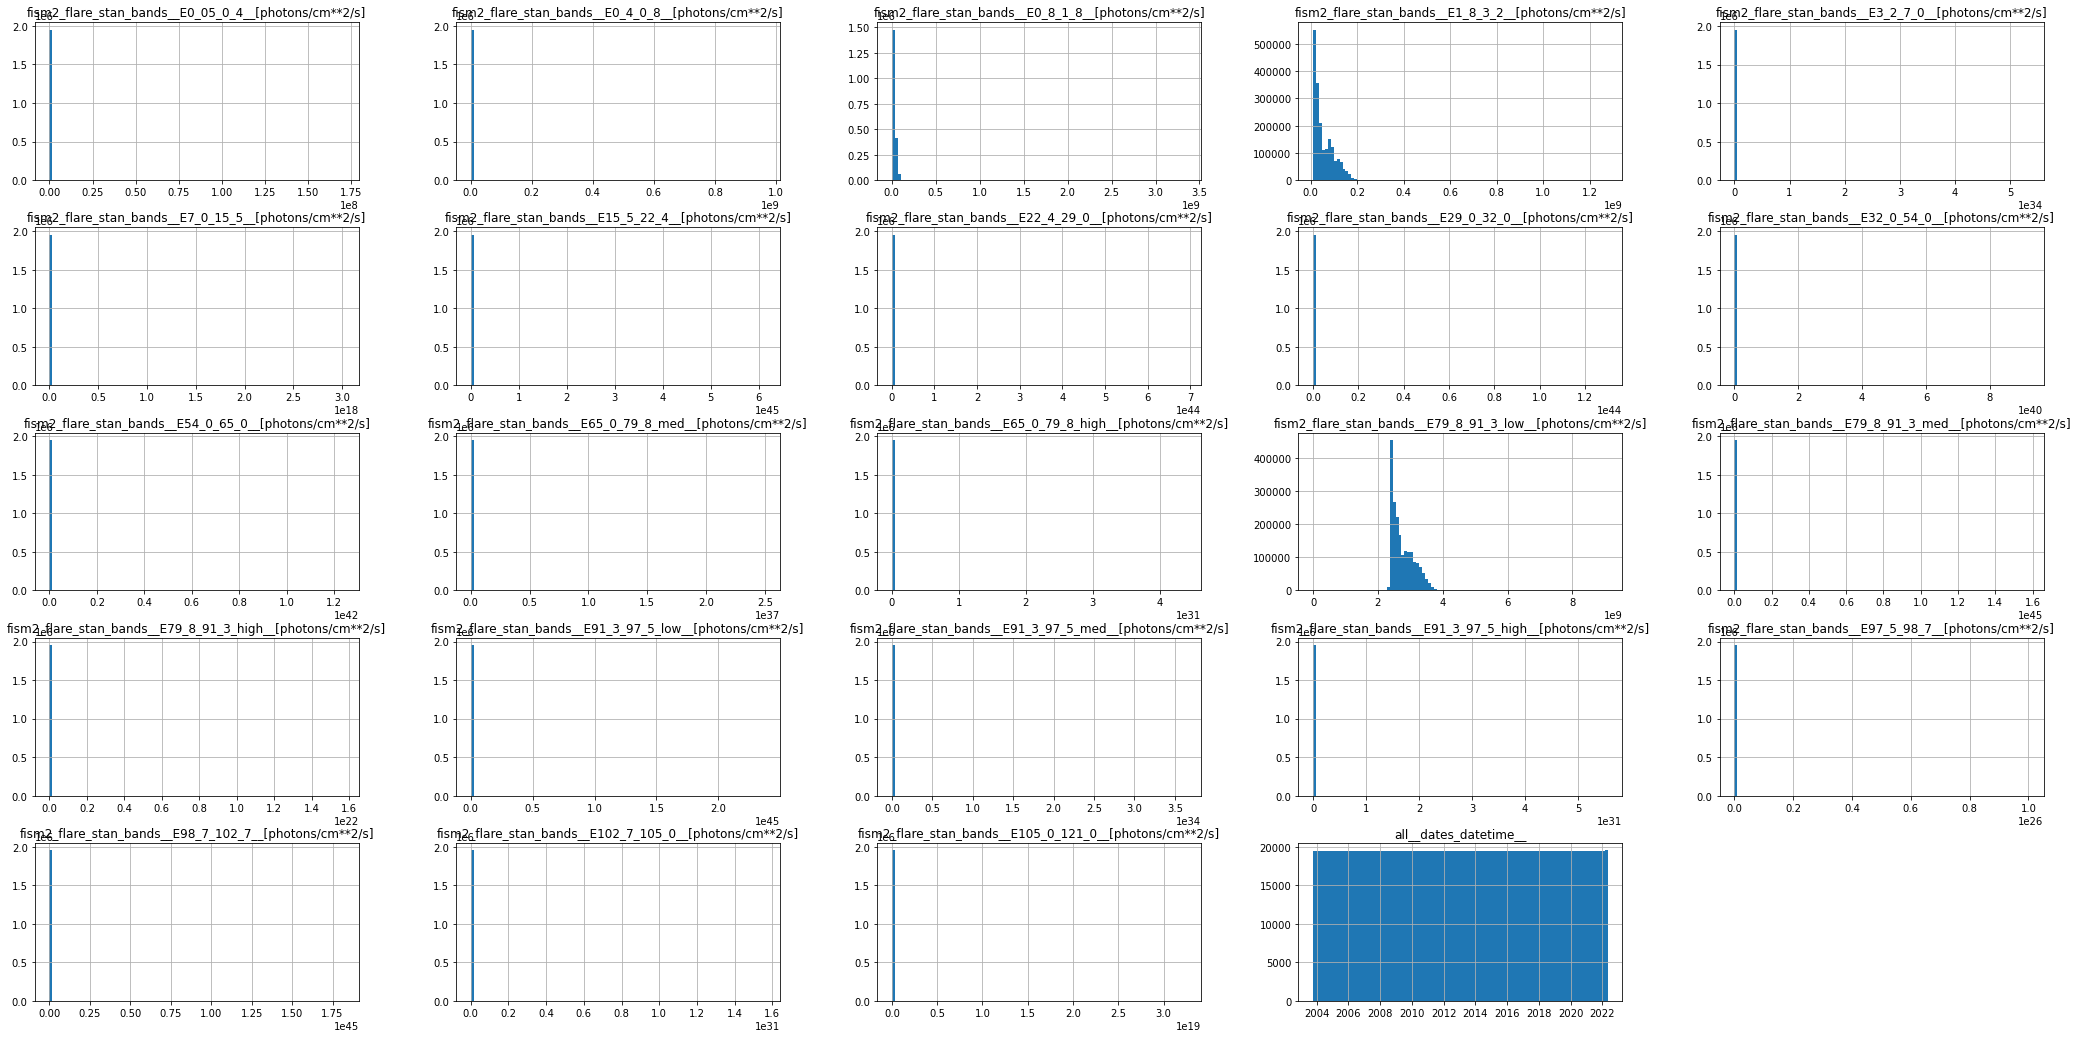

In [65]:
data_fism2_stan_bands_flare.hist(bins=100,figsize=(36,18))

array([[<AxesSubplot:title={'center':'omniweb__id_for_imf_spacecraft__'}>,
        <AxesSubplot:title={'center':'omniweb__id_for_sw_plasma_spacecraft__'}>,
        <AxesSubplot:title={'center':'omniweb__#_of_points_in_imf_averages__'}>,
        <AxesSubplot:title={'center':'omniweb__#_of_points_in_plasma_averages__'}>,
        <AxesSubplot:title={'center':'omniweb__percent_of_interpolation__'}>,
        <AxesSubplot:title={'center':'omniweb__timeshift__[s]'}>,
        <AxesSubplot:title={'center':'omniweb__rms_timeshift__[s]'}>],
       [<AxesSubplot:title={'center':'omniweb__rms_min_variance__[s**2]'}>,
        <AxesSubplot:title={'center':'omniweb__time_btwn_observations__[s]'}>,
        <AxesSubplot:title={'center':'omniweb__imf_magnitude_average__[nT]'}>,
        <AxesSubplot:title={'center':'omniweb__bx_gse/gsm__[nT]'}>,
        <AxesSubplot:title={'center':'omniweb__by_gse__[nT]'}>,
        <AxesSubplot:title={'center':'omniweb__bz_gse__[nT]'}>,
        <AxesSubplot:title={'cente

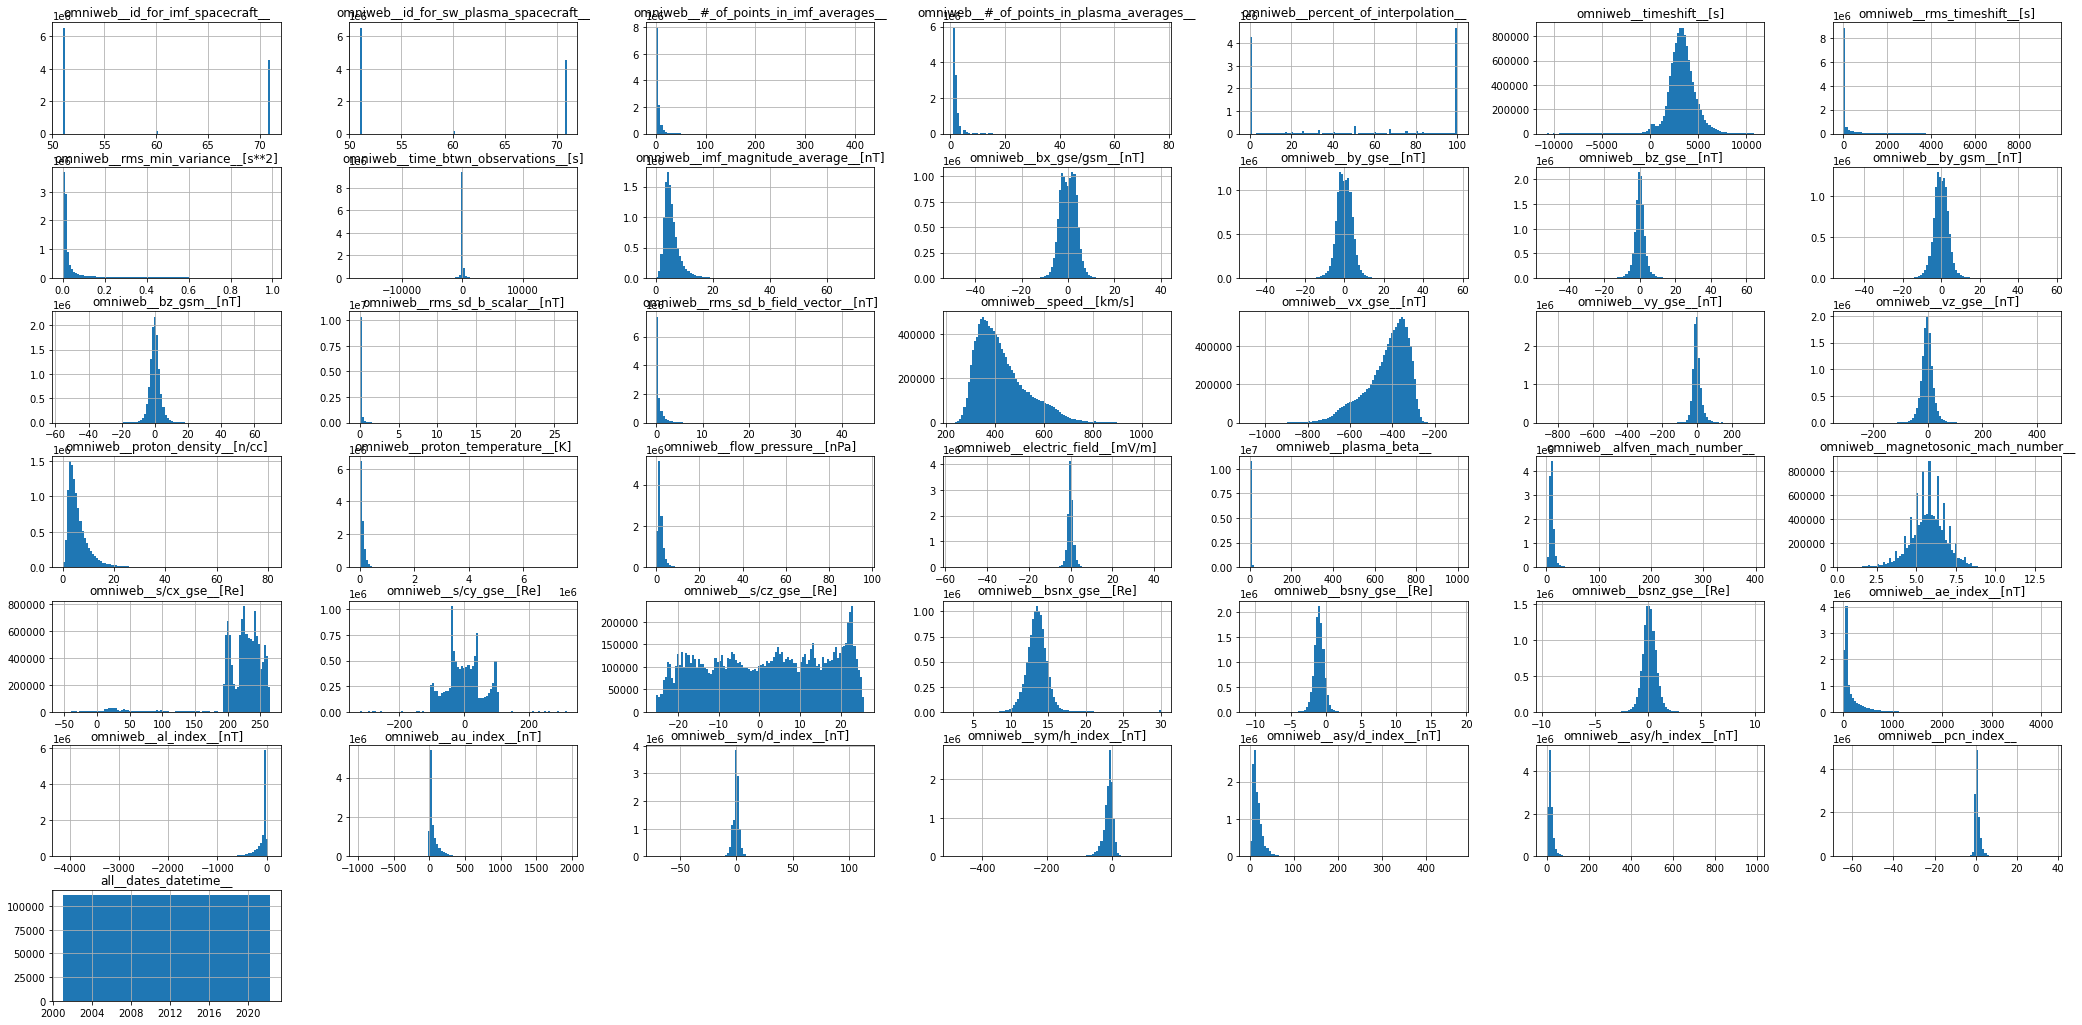

In [61]:
data_omni.hist(bins=100,figsize=(36,18))